In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import os
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error



In [2]:
dataset = house_data.drop(["id", "sqft_lot", "sqft_above", "zipcode", "sqft_living15", "sqft_lot15"], axis = 1)

In [3]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,291.509045,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,442.575043,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


In [19]:
print(house_data.shape)
print(dataset.shape)

(21613, 21)
(21613, 15)


In [20]:
dataset.dropna() 

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,7,0,1955,0,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,6,0,1933,0,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,7,910,1965,0,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,8,0,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,3,8,0,2009,0,47.6993,-122.346
21609,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,3,8,0,2014,0,47.5107,-122.362
21610,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,3,7,0,2009,0,47.5944,-122.299
21611,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,3,8,0,2004,0,47.5345,-122.069


Text(0, 0.5, 'Prices')

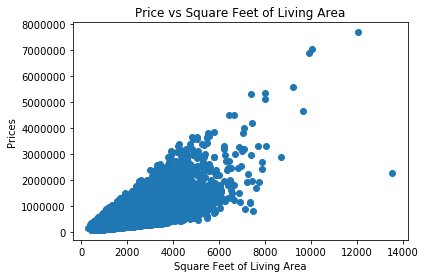

In [7]:
plt.scatter(dataset['sqft_living'], dataset['price'])
plt.title("Price vs Square Feet of Living Area")
plt.xlabel("Square Feet of Living Area")
plt.ylabel("Prices")

Text(0, 0.5, 'Prices')

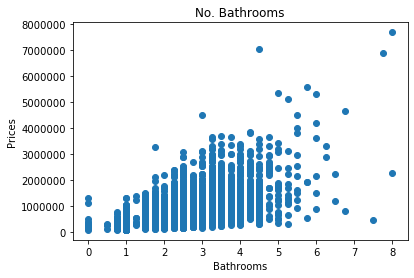

In [8]:
plt.scatter(dataset['bathrooms'], dataset['price'])
plt.title('No. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Prices')

Text(0, 0.5, 'Count')

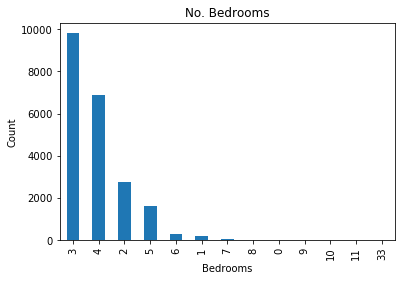

In [9]:
dataset['bedrooms'].value_counts().plot(kind='bar')
plt.title("No. Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

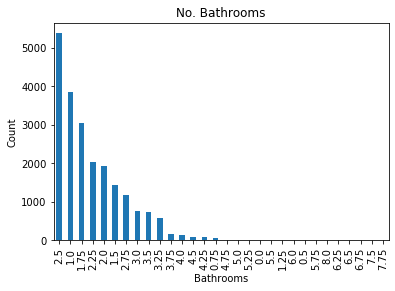

In [10]:
dataset['bathrooms'].value_counts().plot(kind='bar')
plt.title('No. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [28]:
data = dataset.to_numpy()
X = data[:,1:]
Y = data[:,0]

print(X.shape)
print(Y.shape)

(21613, 14)
(21613,)


In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3)
X_vald, X_test, y_vald, y_test = train_test_split(X_temp, y_temp, test_size=0.3)

print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)


(15129, 14)
(4538, 14)
(1946, 14)


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#def normalize(dataset):
#    dataset = pd.get_dummies(dataset, drop_first=True)
#    normData = ((dataset - dataset.min())/(dataset.max() - dataset.min()))
#    return normData


In [143]:
#train_nrm = normalize(X_train)
#test_nrm = normalize(X_test)

In [144]:
#train_nrm.shape

In [42]:
def  featureNormalize(X):
    
    X_norm = X.copy()
    mu = np.zeros(X.shape[0])
    sigma = np.zeros(X.shape[0])

    mu = np.mean(X, axis = 1)    
    sigma = np.std(X, axis = 1)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


In [43]:
X_tr_nrm, mu, sigma = featureNormalize(X_train)
X_ts_nrm = (X_test - mu) / sigma
X_vd_nrm = (X_vald - mu) / sigma


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [149]:
X_tr_nrm = np.concatenate([np.ones((y_train.size, 1)), X_tr_nrm], axis=1 )
X_ts_nrm = np.concatenate([np.ones((y_test.size, 1)), X_ts_nrm], axis=1 )
X_vald_nrm = np.concatenate([np.ones((y_vald.size, 1)), X_valdn_nrm], axis=1 )


NameError: name 'X_tr_nrm' is not defined

In [82]:
def computeCost(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta) 
    h_y = (h - y)**2
    summ = np.sum(h_y, axis = 0)
    J = (1 / (2*m) ) * summ
    return J

In [83]:
theta = np.zeros(X_train.shape[1])

In [84]:
x = pd.get_dummies(X_train, drop_first=True)
theta = np.zeros(x.shape[1])
J = computeCost(x, y_train, theta)
print(J)

213650337335.7533


In [85]:
def GradientDescent(X, y, theta, alpha, itern):
    n = y.shape[0]
    theta = theta.copy()
    J_tot = []
    for i in range(itern):
        h = np.dot(X, theta)
        h_y = h - y
        s = np.dot(h_y, X)
        theta = theta - alpha * (1/m)*s
        
        J_tot.append(computeCost(X, y, theta))
    
    return theta, J_tot

In [86]:
itern = 3
alpha = 0.01

theta, J_tot = GradientDescent(x, y_train, theta, alpha, itern)
print(theta)

[ 2.13557319e+48  1.78749217e+44  1.12535609e+39  7.06914570e+38
  6.92052733e+41  3.88271284e+42  5.01149628e+38  2.36231511e+36
  7.96114328e+37  1.13278967e+39  2.55418942e+39  5.95608712e+41
  9.64440208e+40  6.57260075e+41  2.68212326e+40  3.26965736e+43
  1.58550184e+40 -4.07421519e+40  6.62044856e+41  3.45457203e+42
  1.06213347e+35  1.22692347e+35  1.37157845e+36  1.25428274e+36
  1.27954031e+36  1.21485527e+36  1.32823858e+36  6.93872699e+34
  4.06823725e+34  1.32361991e+36  1.29149894e+36  1.08313591e+36
  1.49542672e+36  1.21951843e+36  1.16263555e+34  8.95056166e+34
  1.46391862e+36  1.80630865e+36  1.36328526e+36  1.48694458e+36
  1.13642962e+36  1.33684918e+35  7.95793110e+34  1.28410424e+35
  1.57975324e+36  1.72417088e+36  1.24824736e+36  9.73936775e+35
  4.75596258e+34  1.49806602e+35  1.06280134e+36  1.55023655e+36
  1.63854376e+36  1.30722255e+36  1.13048147e+36  9.39621551e+34
  2.44176923e+35  1.58342589e+36  1.59933934e+36  1.35789368e+36
  1.40801036e+36  1.14368

AttributeError: 'NoneType' object has no attribute 'update'

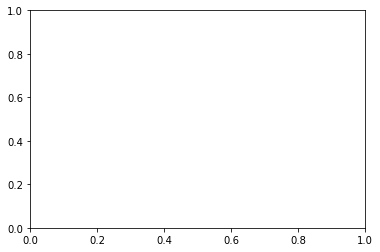

In [13]:
plt.plot(X_test.sample(100), X_train.sample(100))